# Seminar 2: Sound Analysis and Synthesis

## Acoustic Engineering 2024-2025

Genís Plaja - genis.plaja@upf.edu
<br>Adriana Modrego - adriana.modrego@upf.edu
<br>Zat Pros - zat.pros01@estudiant.upf.edu
__<p>18<sup>th</sup> OCTOBER 2024<p>__

## Instructions for submission

Like in the previous seminar session, you will have to submit this *jupyter notebook* with all the answers.

__CONSIDERATIONS__:
* Comment the code when needed.
* **ALL RESPONSES MUST BE JUSTIFIED.** Don't submit a *report* but please justify and discuss your experiments using markdown cells.
* **PLEASE DO NOT SEND YOUR GENERATED AUDIOS BUT DO SEND THE EXTERNAL AUDIO FILES YOU USE TO COMPLETE YOUR LAB. OTHERWISE WE WON'T BE ABLE TO EXECUTE IT.**
* You can upload files to Collab!


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy
from scipy.io.wavfile import read

## Audio Signal Analysis

In this exercise, you will analyze your audio signals containing a single note. By examining their spectrum, you will identify the principal harmonics of the sound. Your task is to document the frequencies and relative amplitudes of the first 8-10 harmonics for further analysis.

The **Fast Fourier Transform (FFT)** is an efficient implementation of the Fourier transform used in signal processing. By using the `fft()` function from the NumPy library, we can calculate and visualize the magnitude of the Fourier transform.

For example, if we have a signal **xx** in the time domain, i.e., amplitude values, and we want to visualize its spectral components (frequency domain), we can use the following code:

(Text(0.5, 0, 'Frequency (Hz)'), Text(0, 0.5, 'Energia'))

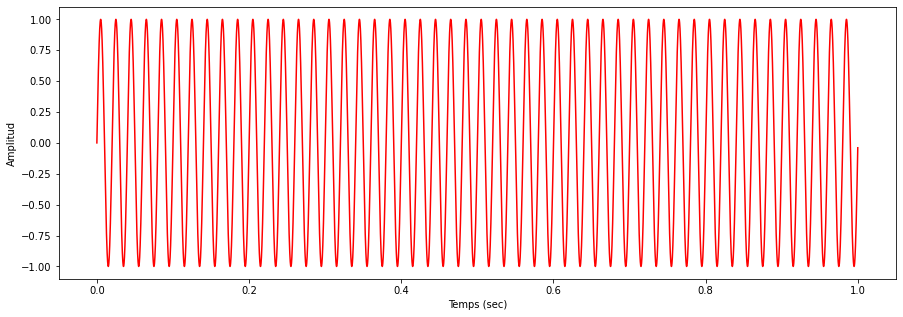

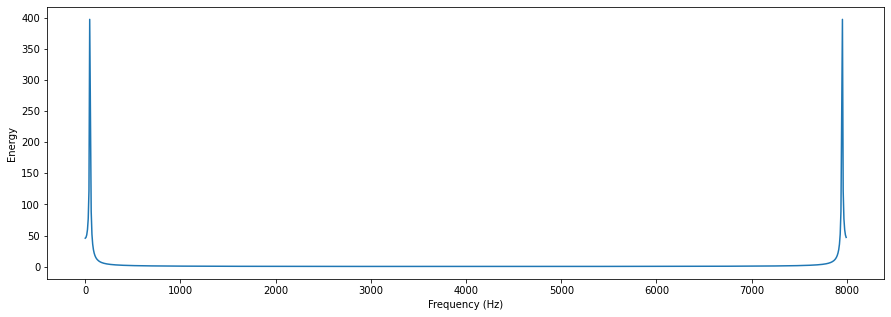

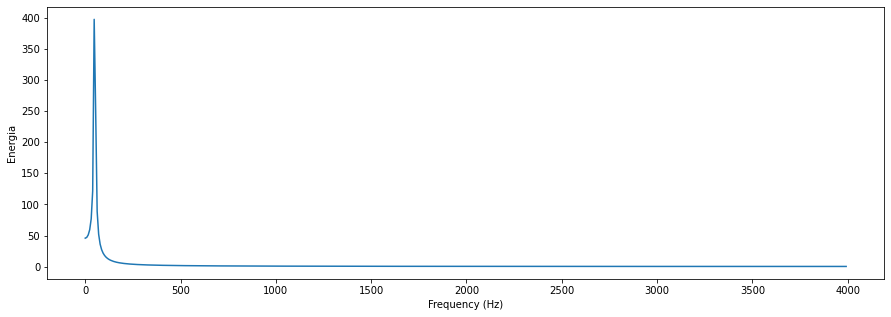

In [8]:
fs = 8000.0
Nfft = 1024 # we define here the size that we want for the FFT
tt = np.arange(0, 1, 1.0/fs)
f = 50
xx = np.sin(2 * np.pi * f * tt)

plt.figure(figsize=(15,5))
plt.plot(tt, xx, 'r'), plt.xlabel('Temps (sec)'), plt.ylabel('Amplitud')

# we save the FFT magnitud in zz
zz = np.abs(np.fft.fft(xx, n=Nfft))

# we create a new figure
plt.figure(figsize=(15,5))

# we generate a vector to define the frequencies axis. Remember that the values of this axis goes from 0 to
# the signal sampling frequency in steps of fs/Nfft.
xf = np.arange(0, fs, fs/float(Nfft))

plt.plot(xf, zz) # we plot the spectrum
plt.xlabel('Frequency (Hz)'), plt.ylabel('Energy')

# in general we are only interested in half of the spectrum since it is symmetric
plt.figure(figsize=(15,5))
plt.plot(xf[:int(Nfft/2)], zz[:int(Nfft/2)])
plt.xlabel('Frequency (Hz)'), plt.ylabel('Energia')


<div class="alert alert-block alert-success">

__a) Create a function `FFTvisualize(xx, Nfft, fs)` to visualize the spectrum of your chosen single note sound. (xx will be the signal in the temporal domain and Nfft the size of the FFT). Create a subplot where there are different ranges on the x-axis to see the peaks of the spectrum in more or less detail Use `plt.xlim()` to zoom in to different parts of the plot and explain what you see.__


</div>

In [9]:

def read_sound(file):
  """ read a mono wav sound file, assuming is mono, and convert it to a floating point array
    Args:
      file (str): File name
    Returns:
      sound_array (numpy.array): Array of samples as floating point values between -1 and 1
      sampling_rate (int): Sampling rate
  """
  # read sound file
  sampling_rate, x = read(file)
  # convert to floating point values between -1 and 1, assuming x are 16 bit integers
  sound_array = np.float32(x) / 2**15
  return sound_array, sampling_rate

def FFTvisualize(xx, Nfft, fs):
    zz = np.abs(np.fft.fft(xx, n=Nfft))
    xf = np.arange(0, fs, fs/float(Nfft))

    plt.figure(figsize=(20, 10))

    # Subplot 1: Visualization of the frequency range where all visible peaks appear
    plt.subplot(311)
    plt.plot(xf[:int(Nfft/2)], zz[:int(Nfft/2)])
    plt.xlim(0, 1000)
    plt.grid()
    plt.title('General Vision')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Energy')

    # Subplot 2: Peaks 1,2,3 Frequency and energy range close up
    plt.subplot(312)
    plt.plot(xf[:int(Nfft/2)], zz[:int(Nfft/2)])
    plt.xlim(0, 300)
    plt.ylim(40, 180)
    plt.grid()
    plt.title('Peaks 1,2,3 Frequency and energy range close up')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Energy')

    # Subplot 3: Peaks 4,5,6 Frequency and energy range close up
    plt.subplot(313)
    plt.plot(xf[:int(Nfft/2)], zz[:int(Nfft/2)])
    plt.xlim(300, 550)
    plt.ylim(0, 30)
    plt.grid()
    plt.title('Peaks 4,5,6 Frequency and energy range close up')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Energy')

    plt.tight_layout()
    plt.show()

sound, fs = read_sound('../AE_S2/359681__mtg__sax-soprano-d5.wav')

FFTvisualize(sound, 1024, fs)

FileNotFoundError: [Errno 2] No such file or directory: '../AE_S2/359681__mtg__sax-soprano-d5.wav'

<div class="alert alert-block alert-success">

__b) Use the `FFTvisualize()` function to analyze the spectral components of the sound you downloaded in a stable part of the signal - for example, the middle part. To do it:__

* Read the audio file.
* Use `FFTvisualize()` to generate the plot. If you only want to use part of the signal, this is where you should specify it.
* Choose a plot axis scale that allows you to see the values well.
  
__We know that the peaks of the spectrum correspond to the sinusoidal components of the signal. Explain the relationship between these peaks: are they harmonic? how are their amplitudes related?, e.g., are they halved? Do they follow a pattern?__

__Remember to note down the frequencies and relative amplitudes of the first 8-10 harmonics and store them in two lists.__

</div>

## Audio Synthesis

In this exercise, you will synthesize harmonics of a musical note by generating sinusoidal waves based on their frequencies and amplitudes. You will compare the synthesized sound to the original, discussing differences in tonal quality and characteristics. Finally, you will replicate a melody using your synthesized instrument and analyze the results.

<div class="alert alert-block alert-success">

__a) We start by implementing a function `singen()` to easily create a sinusoid. Inputs should be amplitude, frequency, sampling frequency, and phase phi.__

</div>


In [ ]:
def singen(amplitude, frequency, sampling_frequency, phi):
    """
    Generates a sinusoidal signal based on the given parameters.
    
    Parameters:
    amplitude (float): The amplitude of the sinusoid.
    frequency (float): The frequency of the sinusoid in Hz.
    sampling_frequency (float): The sampling frequency in Hz.
    phi (float): The phase of the sinusoid in radians.

    Returns:
    sinusoid (numpy.ndarray): The generated sinusoidal signal.
    """
    return sinusoid


<div class="alert alert-block alert-success">

__a) Create a `synth(f0)` function that generates a signal with similar characteristics to the signal you just analyzed (your chosen sound).__

__Use the `singen()` function from the previous exercise to synthesize the sinusoidal components. The function must receive a single parameter: the fundamental frequency of the sound, $f_0$, in Hz.__

_Note: this exercise it is about trying to synthesize a sound similar to the original. To do this, you will need to generate a complex signal (with harmonics) where each component has a frequency and an amplitude that roughly follows the relationships between the values you found in the analysis in the previous section. For example: If you found that the fundamental has frequency 220 and the energy of the spectrum is X, and the first harmonic is 440 with 75% of the energy of the first, you should reflect this when deciding the amplitude of each component in the synthesis._
</div>

In [ ]:
def synth(f0):
    """
    Generates a synthesized signal based on the fundamental frequency and its harmonics.
    
    Parameters:
    f0 (float): The fundamental frequency of the sound in Hz
    
    Returns:

    signal (numpy.ndarray): The synthesized audio signal.
    """
    return signal

<div class="alert alert-block alert-success">
    
__b) Write in a file the signal generated with the function for a $f_0$ equal to that of the original sound. Compare the synthesized sound with the original sound. Do they look alike? Why? And what's different about them?__

</div>

<div class="alert alert-block alert-success">
    
__c) Make a subplot with the spectrum of the original signal and the signal (remember to use only the first half of the spectrum). Compare them and explain the differences you see.__

</div>

<div class="alert alert-block alert-success">

    
__d) By changing the input parameter `f0` of the function that generates the synthetic sound, copy the melody of the sound you chose for the previous seminar. At Least 5 notes have to be in the melody: call the function as many times as the notes you want, concatenate the result, and finally use `IPython.display. Audio()` to play it. You can also export the melody as an audio file.__

</div>

<div class="alert alert-block alert-success">

__e) Finally plot the two waveforms and spectrograms and compare.__

 </div>